# <font color='blue'>Data Science - Data Analysis and Creation of Machine Learning Models to be integrated with Web Application.</font>

In [ ]:
!pip install -q -U watermark

In [ ]:
# Imports
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%reload_ext watermark
%watermark -a "Gabriel Lopes de A. Dutra"

Author: Gabriel Lopes de A. Dutra



## Loading the data.

In [ ]:
# Load the dataset.
df = pd.read_csv("dataset.csv")

In [ ]:
# Shape
df.shape

(64461, 61)

In [ ]:
# View sample data.
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Attribute Engineering and Data Cleaning

Our goal is to predict a technology professional's salary. We'll work with a few predictor variables, and the target variable will be ConvertedComp (financial compensation).

In [ ]:
# We'll work with just a few variables that might be sufficient to feed a model with a good R2. This is an experimental process, and if our approach isn't optimal, we can always go back and modify our approach to find a more efficient solution.
df = df[["Country", "DevType", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]

In [ ]:
df

,Country,DevType,EdLevel,YearsCodePro,Employment,ConvertedComp
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN
...,...,...,...,...,...,...
64456,United States,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,NaN,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,Employed full-time,NaN


In [ ]:
# We adjusted the name of one of the variables to better reflect its meaning.
df = df.rename({"ConvertedComp": "Salary"}, axis = 1)

In [ ]:
# Data sample
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [ ]:
# Data sample
df.tail()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
64456,United States,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,NaN,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,Employed full-time,NaN
64460,Spain,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Employed full-time,NaN


In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   DevType       49370 non-null  object 
 2   EdLevel       57431 non-null  object 
 3   YearsCodePro  46349 non-null  object 
 4   Employment    63854 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
# We filter the data keeping only non-null values
df = df[df["Salary"].notnull()]

In [ ]:
df

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0
...,...,...,...,...,...,...
64142,Nigeria,"Academic researcher;Developer, back-end;Educator","Secondary school (e.g. American high school, G...",2,Employed part-time,984.0
64148,Colombia,"Developer, QA or test","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,19428.0
64152,United States,"Developer, back-end;Developer, front-end;Devel...",Some college/university study without earning ...,20,Employed full-time,200.0
64153,Chile,"Developer, full-stack;Developer, QA or test;Sy...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Employed full-time,15048.0


In [ ]:
# Some variables have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   DevType       34367 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Employment    34717 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
# Let's eliminate records with missing values. There are several techniques we can use to address missing values. The focus here isn't on these techniques, but rather on creating a well-performing model for integration with a web application.
df = df.dropna()

In [ ]:
# Problem solved
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [ ]:
# Valores únicos da variável categórica
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [ ]:
# Unique values of the categorical variable
df['Employment'].value_counts()

Employment
Employed full-time                                      29722
Independent contractor, freelancer, or self-employed     2977
Employed part-time                                        997
Name: count, dtype: int64

In [ ]:
# We will only keep records of those who work full-time, because the amount of data compared to other categories is much larger.
df = df[df["Employment"] == "Employed full-time"]

In [ ]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [ ]:
# But now we don't need this variable anymore because now it is in fact a constant
df = df.drop("Employment", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,38916.0


In [ ]:
# Unique values of the variable
df['DevType'].unique()

array(['Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       ...,
       'Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager',
       'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineer, data;Engineering manager;System administrator',
       'Developer, full-stack;Developer, QA or test;System administrator'],
      dtype=object)

In [ ]:
# Let's convert the variable to a list by splitting it by ;
df['DevType'] = df['DevType'].str.split(";")

In [ ]:
print(df['DevType'])

7        [Developer, back-end, Developer, desktop or en...
9        [Database administrator, Developer, full-stack...
10       [Developer, back-end, Developer, desktop or en...
11                        [Designer, Developer, front-end]
12                         [Designer, Developer, back-end]
                               ...                        
64135    [Developer, embedded applications or devices, ...
64148                              [Developer, QA or test]
64152    [Developer, back-end, Developer, front-end, De...
64153    [Developer, full-stack, Developer, QA or test,...
64154                               [Developer, front-end]
Name: DevType, Length: 29722, dtype: object


In [ ]:
# We search for the first element of the list
df['DevType'] = df['DevType'].str[0]

In [ ]:
print(df['DevType'])

7                                Developer, back-end
9                             Database administrator
10                               Developer, back-end
11                                          Designer
12                                          Designer
                            ...                     
64135    Developer, embedded applications or devices
64148                          Developer, QA or test
64152                            Developer, back-end
64153                          Developer, full-stack
64154                           Developer, front-end
Name: DevType, Length: 29722, dtype: object


In [ ]:
# Unique values
len(df['DevType'].unique())

23

In [ ]:
# Record count by category
df['DevType'].value_counts()

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
System administrator                                72
Engineer, site reliability                          47
Se

In [ ]:
# Function definition that takes two inputs: 'categories', which is a series of categorical data,
# and 'cutoff', which is a numerical limit

def reduce_categories(categories, cutoff):
    
    categorical_map = {} # Initializes an empty dictionary to map categories.
    
    for i in range(len(categories)): # Starts a loop that loops through all the elements in the 'categories' series.
        if categories.values[i] >= cutoff: # Checks if the current category value is greater than or equal to the cutoff.
            categorical_map[categories.index[i]] = categories.index[i] # If true, maps the category to itself in the dictionary.
        else:
            categorical_map[categories.index[i]] = 'Other' # If false, maps the category to 'Other'.
    
    return categorical_map # After the loop, return the dictionary with the category mapping.

In [ ]:
# Applies the function by filtering categories with more than 100 records.
dev_map = reduce_categories(df['DevType'].value_counts(), 100)

In [ ]:
# Now we map the previous item to the current value of the variable and save it in the variable itself.
df['DevType'] = df['DevType'].map(dev_map)

In [ ]:
# Records by category.
df['DevType'].value_counts()

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
Other                                              257
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
Name: count, dtype: int64

In [ ]:
# Records by category
df['Country'].value_counts()

Country
United States     7468
India             2409
United Kingdom    2247
Germany           1891
Canada            1161
                  ... 
Swaziland            1
Niger                1
Belize               1
Yemen                1
Andorra              1
Name: count, Length: 154, dtype: int64

In [ ]:
# We created the mapping by filtering categories with more than 400 records.
country_map = reduce_categories(df.Country.value_counts(), 400)

In [ ]:
# We apply the mapping
df['Country'] = df['Country'].map(country_map)

In [ ]:
# Records by category
df.Country.value_counts()

Country
Other                 8482
United States         7468
India                 2409
United Kingdom        2247
Germany               1891
Canada                1161
Brazil                 985
France                 966
Spain                  666
Australia              650
Netherlands            648
Poland                 564
Italy                  556
Russian Federation     521
Sweden                 508
Name: count, dtype: int64

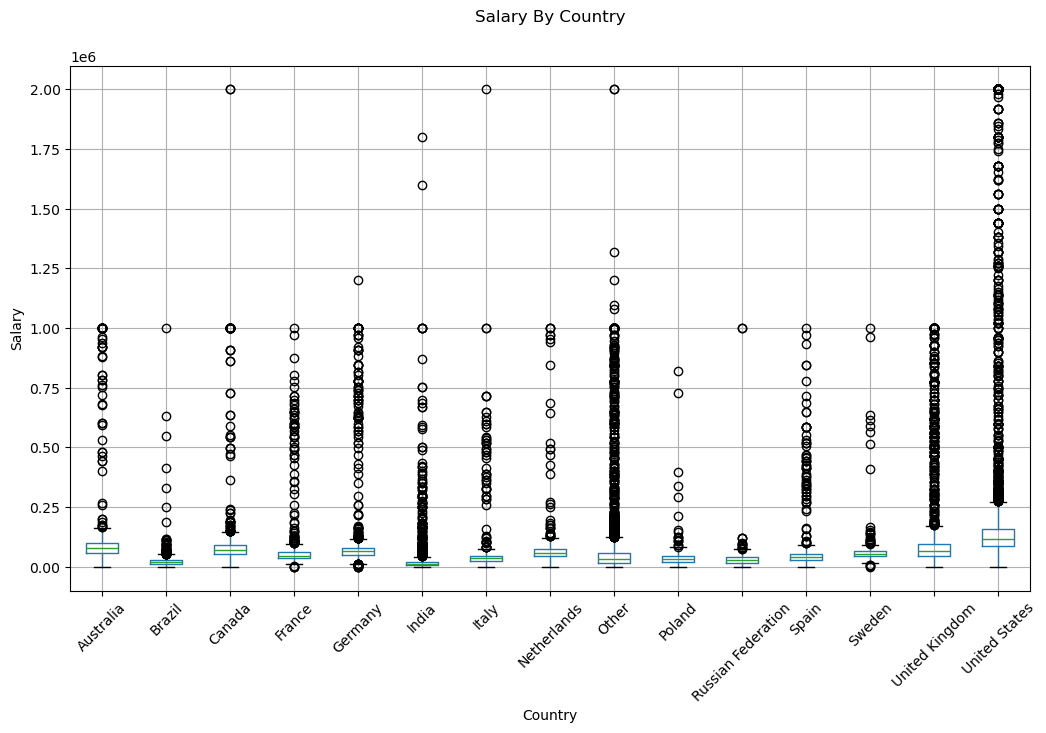

In [ ]:
# Plot
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary By Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Let's apply another filter to the data, removing outliers and "Other" categories
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']

In [ ]:
df.shape

(19047, 5)

In [ ]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,Database administrator,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Designer,Some college/university study without earning ...,7,14268.0
12,Netherlands,Designer,"Secondary school (e.g. American high school, G...",20,38916.0


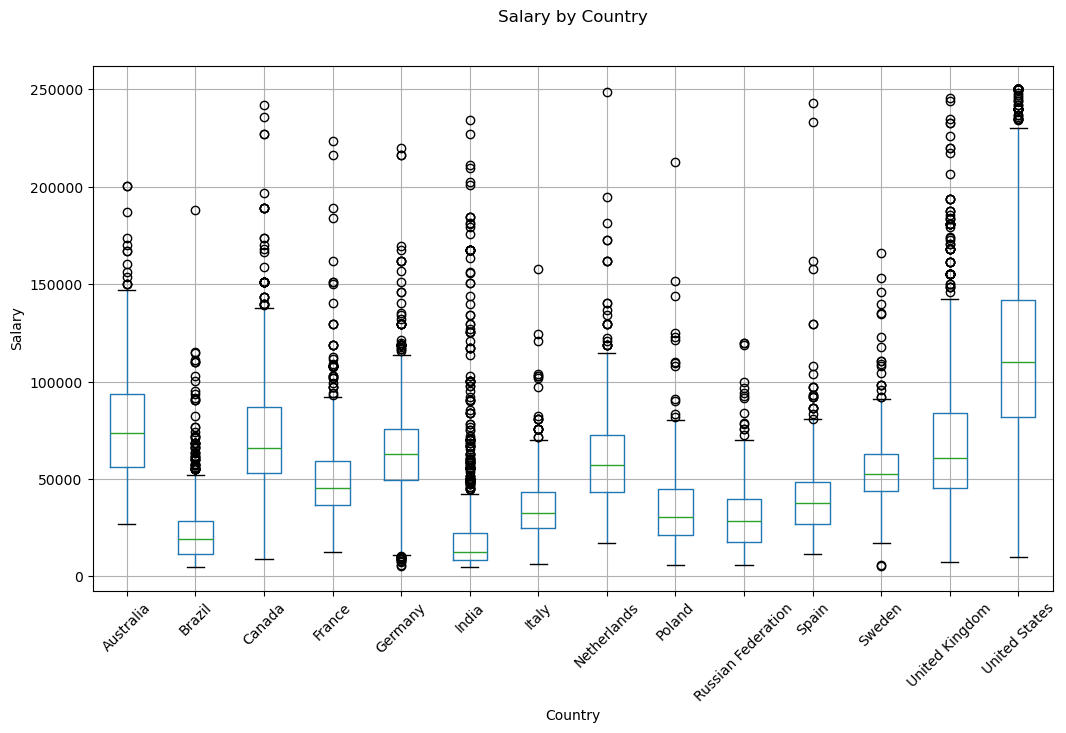

In [ ]:
# Plot
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Unique values
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [ ]:
# Function to convert the categorical values identified above to numeric values.
def adjust_experience_time(xp_time):
    if xp_time ==  'More than 50 years':
        return 50
    if xp_time == 'Less than 1 year':
        return 0.5
    return float(xp_time)

In [ ]:
# Apply the function
df['YearsCodePro'] = df['YearsCodePro'].apply(adjust_experience_time)

In [ ]:
# Unique values
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [ ]:
# Unique values
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [ ]:
# Function to reduce the number of categories of the variable
def adjust_educational_level(education_level):
    if 'Bachelor’s degree' in education_level:
        return 'Bachelor’s degree'
    if 'Master’s degree' in education_level:
        return 'Master’s degree'
    if 'Professional degree' in education_level or 'Other doctoral' in education_level:
        return 'Post grad'
    return 'Less than a Bachelors'

In [ ]:
# Apply the function
df['EdLevel'] = df['EdLevel'].apply(adjust_educational_level)

In [ ]:
# Records by category
df["EdLevel"].value_counts()

EdLevel
Bachelor’s degree        9592
Master’s degree          4899
Less than a Bachelors    3599
Post grad                 957
Name: count, dtype: int64

In [ ]:
# Just periodically check to see if missing values appeared during the transformations.
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [ ]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end",Bachelor’s degree,13.0,116000.0
9,United Kingdom,Database administrator,Master’s degree,4.0,32315.0
10,United Kingdom,"Developer, back-end",Bachelor’s degree,2.0,40070.0
11,Spain,Designer,Less than a Bachelors,7.0,14268.0
12,Netherlands,Designer,Less than a Bachelors,20.0,38916.0


In [ ]:
# Mapping to convert categorical variable into numeric representation
map_ed_level = {'Less than a Bachelors': 0, 
                'Bachelor’s degree': 1, 
                'Master’s degree': 2, 
                'Post grad': 3}

In [ ]:
# Apply the mapping
df['EdLevel'] = df['EdLevel'].map(map_ed_level)

In [ ]:
# Mapping to convert categorical variable into numerical representation
map_pais = {'Other': 0,  
            'United States': 1,
            'India': 2,
            'United Kingdom': 3,
            'Germany': 4,
            'Canada': 5,
            'Brazil': 6,
            'France': 7,
            'Spain': 8,
            'Australia': 9,
            'Netherlands': 10,
            'Poland': 11,
            'Italy': 12,
            'Russian Federation': 13,
            'Sweden': 14 }

In [ ]:
# Apply the mapping
df['Country'] = df['Country'].map(map_pais)

In [ ]:
# Mapping to convert categorical variable into numerical representation
map_dev_type = {'Developer, back-end': 0,
                'Developer, full-stack': 1,
                'Database administrator': 2,
                'Developer, front-end': 3, 
                'Data or business analyst': 4,
                'Academic researcher': 5,
                'Designer': 6,
                'Developer, desktop or enterprise applications': 7,
                'Data scientist or machine learning specialist': 8,
                'Developer, mobile': 9,
                'Developer, embedded applications or devices': 10,
                'Other': 11,
                'DevOps specialist': 12,
                'Developer, QA or test': 13,
                'Engineer, data': 14,
                'Engineering manager': 15,
                'Developer, game or graphics': 16}

In [ ]:
# Apply the mapping
df['DevType'] = df['DevType'].map(map_dev_type)

In [ ]:
# Just periodically check to see if missing values appeared during the transformations.
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [ ]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,1,0,1,13.0,116000.0
9,3,2,2,4.0,32315.0
10,3,0,1,2.0,40070.0
11,8,6,0,7.0,14268.0
12,10,6,0,20.0,38916.0


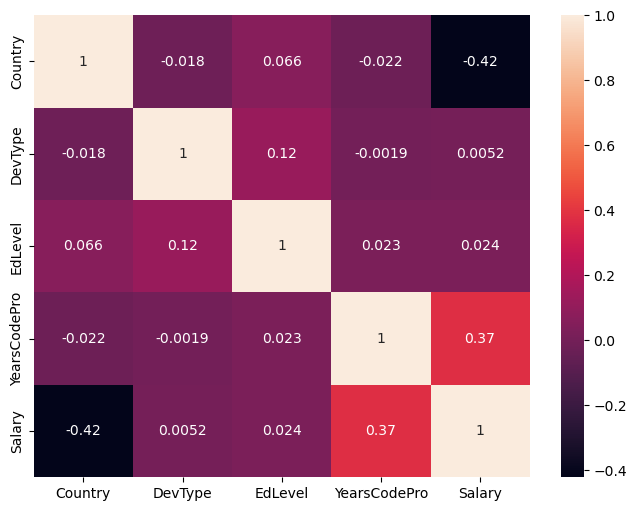

In [ ]:
# Correlation Map
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True);

## Data Pre-Processing

In [ ]:
# Separation into predictor variables and target variable.
X = df.drop("Salary", axis = 1)
y = df["Salary"]

In [ ]:
# Division of training sets and test sets
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# print the shape of the training and testing datasets
print(f"X_training :{X_training.shape}\nX_test: {X_test.shape}",
      f"\ny_training: {y_training.shape}\ny_test: {y_test.shape}")

X_training :(15237, 4)
X_test: (3810, 4) 
y_training: (15237,)
y_test: (3810,)


In [ ]:
# Creates the standardizer
scaler = StandardScaler()

In [ ]:
# Fit and transform only in training
X_training_scaled = scaler.fit_transform(X_training)

In [ ]:
# Transform em teste (e em novos dados)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Save the pattern as it will be used in the app
pickle.dump(scaler, open('scaler.pkl','wb'))

In [ ]:
X_training_scaled

array([[-0.87563519, -0.51026172, -0.21064541, -0.88242237],
       [-0.35240715, -0.51026172, -0.21064541,  0.30086836],
       [-0.87563519, -0.51026172, -0.21064541, -1.07963749],
       ...,
       [-0.09079313, -0.80479739, -1.48278339, -0.75094562],
       [-0.35240715,  0.37334526, -0.21064541, -0.88242237],
       [ 2.26373304,  1.25695225, -0.21064541, -1.01389912]])

In [ ]:
X_test_scaled

array([[ 1.47889098, -0.80479739, -0.21064541,  0.56382186],
       [-0.35240715, -0.21572606, -1.48278339,  0.16939162],
       [ 2.26373304,  1.55148791,  1.06149257,  0.03791487],
       ...,
       [-0.87563519,  1.55148791,  1.06149257,  3.06188007],
       [-0.35240715, -0.80479739, -0.21064541, -0.48799212],
       [-0.87563519,  0.0788096 ,  1.06149257, -0.75094562]])

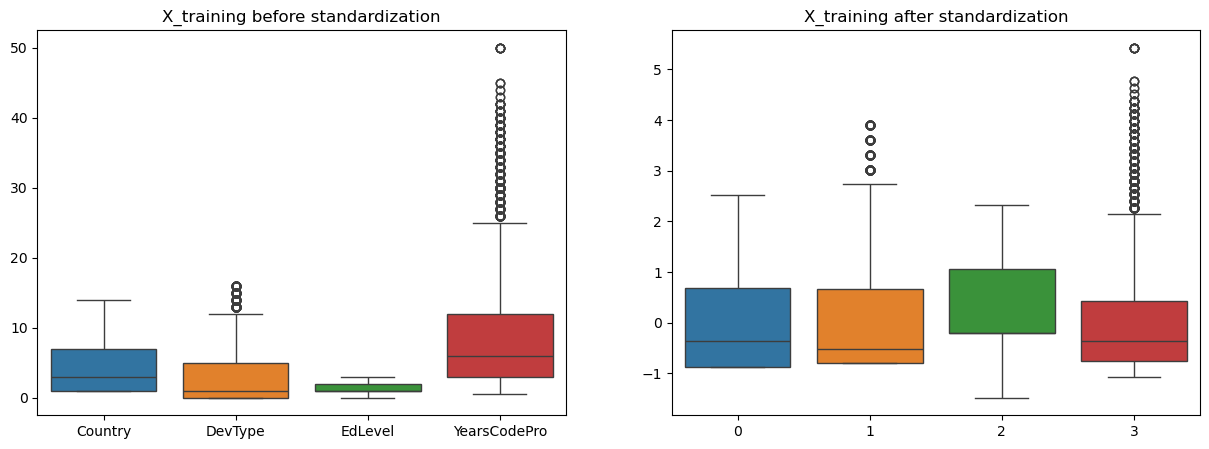

In [ ]:
# Creates a figure and a set of subplots.
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# First subplot for X_training before standardization
sns.boxplot(data = X_training, ax = ax[0])
ax[0].set_title('X_training before standardization')

# Second subplot for X_training before standardization
sns.boxplot(data = X_training_scaled, ax = ax[1])
ax[1].set_title('X_training after standardization')

plt.show()

## Predictive Modeling

### Model Version 1

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Create the model
model_v1 = LinearRegression()

In [ ]:
# Train the model
model_v1.fit(X_training_scaled, y_training)

LinearRegression()

In [ ]:
# Coefficients learned during training
print(model_v1.coef_)
print(model_v1.intercept_)

[-20402.41186609   -232.77432071   2246.52853994  18010.15670058]
73154.83034718121


In [ ]:
# Model hyperparameters
model_v1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Make predictions
y_pred_v1 = model_v1.predict(X_test_scaled)

In [ ]:
# Metrics
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred_v1),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred_v1)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_test, y_pred_v1))),3))
print('R2 Score:', round(r2_score(y_test, y_pred_v1),6))

Mean Absolute Error (MAE): 30712.73
Root Mean Squared Error (RMSE): 40984.106
Root Mean Squared Log Error (RMSLE): 10.621
R2 Score: 0.288011


### Model Version 2

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Create the model
model_v2 = DecisionTreeRegressor(random_state = 1)

In [ ]:
# Train the model
model_v2.fit(X_training_scaled, y_training)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Make predictions
y_pred_v2 = model_v2.predict(X_test_scaled)

In [ ]:
# Metrics
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred_v2),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred_v2)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_test, y_pred_v2))),3))
print('R2 Score:', round(r2_score(y_test, y_pred_v2),6))

Mean Absolute Error (MAE): 23568.01
Root Mean Squared Error (RMSE): 34910.672
Root Mean Squared Log Error (RMSLE): 10.461
R2 Score: 0.483395


### Model Version 3

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# Create the model
model_v3 = RandomForestRegressor(random_state = 1)

In [ ]:
# Train the model
model_v3.fit(X_training_scaled, y_training)

RandomForestRegressor(random_state=1)

In [ ]:
# Make predictions
y_pred_v3 = model_v3.predict(X_test_scaled)

In [ ]:
# Metrics
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred_v3),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred_v3)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_test, y_pred_v3))),3))
print('R2 Score:', round(r2_score(y_test, y_pred_v3),6))

Mean Absolute Error (MAE): 21929.343
Root Mean Squared Error (RMSE): 32286.531
Root Mean Squared Log Error (RMSLE): 10.382
R2 Score: 0.55814


### Hyperparameter Optimization

In [ ]:
# Hyperparameter grid to optimize the model
max_depth = [None,6,8,10,12]
n_estimators = [100,200,300]
min_samples_leaf = [2,3,4,5]
parameters = {"max_depth": max_depth, "n_estimators": n_estimators, "min_samples_leaf": min_samples_leaf}

In [ ]:
# Create the model
final_model = RandomForestRegressor(random_state = 1)

In [ ]:
# Create Grid Search
grid_search = GridSearchCV(final_model, parameters, scoring = 'neg_mean_squared_error')

We train Grid Search by searching for the best combination of hyperparameters.

In [ ]:
%%time
grid_search.fit(X_training_scaled, y_training)

CPU times: user 7min 57s, sys: 245 ms, total: 7min 57s
Wall time: 7min 57s


GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [None, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# The final model is the best estimate found by Grid Search
final_model = grid_search.best_estimator_

In [ ]:
# Training the best estimator.
final_model.fit(X_training_scaled, y_training)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=300,
                      random_state=1)

In [ ]:
# Make predictons
y_pred = final_model.predict(X_test_scaled)

In [ ]:
# Metrics
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(mean_squared_error(y_test, y_pred))),3))
print('R2 Score:', round(r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 20265.022
Root Mean Squared Error (RMSE): 29916.626
Root Mean Squared Log Error (RMSLE): 10.306
R2 Score: 0.620626


## Testing model before deploying.

In [ ]:
# Let's generate new data to test the model before deploying.
new_data = np.array([["United States", 'Master’s degree', 'Developer, full-stack', 15]])
new_data

array([['United States', 'Master’s degree', 'Developer, full-stack',
        '15']], dtype='<U21')

In [ ]:
# Extract the mapping
country_mapping = {country: i for i, country in enumerate(np.unique(new_data[:, 0]))}
education_mapping = {education: i for i, education in enumerate(np.unique(new_data[:, 1]))}
devtype_mapping = {devtype: i for i, devtype in enumerate(np.unique(new_data[:, 2]))}

In [ ]:
# Vectorize X after applying the mapping to the categorical variables
new_data[:, 0] = np.vectorize(country_mapping.get)(new_data[:, 0])
new_data[:, 1] = np.vectorize(education_mapping.get)(new_data[:, 1])
new_data[:, 2] = np.vectorize(devtype_mapping.get)(new_data[:, 2])

In [ ]:
# Convert the array to float to increase precision
new_data = new_data.astype(float)

In [ ]:
print(new_data)

[[ 0.  0.  0. 15.]]


In [ ]:
# Transform into new data
new_data_scaled = scaler.transform(new_data)

In [ ]:
print(new_data_scaled)

[[-1.1372492  -0.80479739 -1.48278339  0.82677536]]


In [ ]:
# Salary forecast with the model
y_pred = final_model.predict(new_data_scaled)

In [ ]:
print(y_pred)

[136289.3620427]


In [ ]:
# Final model to save to disk and proceed to deploy
# We also save the mapping
final_model = {"model": final_model, 
                    "country_mapping": country_mapping, 
                    "education_mapping": education_mapping, 
                    "devtype_mapping":devtype_mapping}

In [ ]:
# Save the model to disk
with open('prediction_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
# loads the model to check if it is working.
with open('prediction_model.pkl', 'rb') as file:
    final_model = pickle.load(file)

In [ ]:
# Loads the pattern maker to check if it is working
with open('scaler.pkl', 'rb') as file:
    final_scaler = pickle.load(file)

In [ ]:
# Extracts the components from the file
loaded_model = final_model["model"]
country_mapping = final_model["country_mapping"]
education_mapping = final_model["education_mapping"]
devtype_mapping  = final_model['devtype_mapping']

In [ ]:
# Transform into new data.
new_data_scaled = final_scaler.transform(new_data)

In [ ]:
# Makes prediction with the model loaded from the disk
y_pred = loaded_model.predict(new_data_scaled)

In [ ]:
print(y_pred)

[136289.3620427]


In [ ]:
%watermark -a "Gabriel Lopes de A. Dutra"

Author: Gabriel Lopes de A. Dutra



Uncomment the cells below and run to check package versions on your machine.

In [ ]:
#%watermark -v -m

In [ ]:
#%watermark --iversions

# End